## Blood Cells Detection

#### *Table of Contents*
*Run on Colab*
1. [Dataset and libraries ](#chapter1)
2. [Yolo training ](#chapter2)
3. [Test output validation ](#chapter3)

- libraries & dataset

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8


In [ ]:
import os
from roboflow import Roboflow
import torch
print(torch.__version__)

2.4.0+cu121


In [ ]:
from google.colab import userdata
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')

In [ ]:
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("clg-vtj9f").project("blood-cell-detection-bsbvn")
version = project.version(4)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to blood-cell-detection-4 in yolov9:: 100%|██████████| 2224/2224 [00:00<00:00, 7835.78it/s]


In [ ]:
# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
!pwd

/content


- yolo training

In [ ]:
!yolo  task=detect mode=train epochs=25 batch=32 plots=True \
model='/content/yolov10n.pt' \
data='/content/datasets/blood-cell-detection-4/data.yaml'

Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov10n.pt, data=/content/datasets/blood-cell-detection-4/data.yaml, epochs=25, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

- output validation

In [ ]:
from ultralytics import YOLO

model_path = '/content/runs/detect/train10/weights/best.pt'
model = YOLO(model_path)
model(source="/content/datasets/blood-cell-detection-4/valid/images", conf=0.25, save=True)


image 1/94 /content/datasets/blood-cell-detection-4/valid/images/BloodImage_00004_jpg.rf.4b9c9c5ec6517d1b521e5ff7ab44d2dc.jpg: 640x640 19 RBCs, 1 WBC, 1 platelets, 13.0ms
image 2/94 /content/datasets/blood-cell-detection-4/valid/images/BloodImage_00007_jpg.rf.340caf2b60950589ae339711ac4e5e6a.jpg: 640x640 18 RBCs, 1 WBC, 1 platelets, 10.4ms
image 3/94 /content/datasets/blood-cell-detection-4/valid/images/BloodImage_00009_jpg.rf.8cbdde28aa0cb0748a3a27ca867158e1.jpg: 640x640 20 RBCs, 1 WBC, 2 plateletss, 9.5ms
image 4/94 /content/datasets/blood-cell-detection-4/valid/images/BloodImage_00018_jpg.rf.d236b99ba7e81c1e7da19c64d35b890c.jpg: 640x640 20 RBCs, 1 WBC, 10.3ms
image 5/94 /content/datasets/blood-cell-detection-4/valid/images/BloodImage_00019_jpg.rf.830ff770aa3eb9d481b787dfe80f468e.jpg: 640x640 20 RBCs, 1 WBC, 1 platelets, 9.6ms
image 6/94 /content/datasets/blood-cell-detection-4/valid/images/BloodImage_00028_jpg.rf.3d6ac411f07229c979875474a33cb1a5.jpg: 640x640 20 RBCs, 1 WBC, 9.3ms
i

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'RBC', 1: 'WBC', 2: 'platelets'}
 obb: None
 orig_img: array([[[157, 142, 170],
         [156, 141, 169],
         [153, 139, 167],
         ...,
         [199, 198, 194],
         [197, 196, 192],
         [197, 196, 192]],
 
        [[157, 142, 170],
         [156, 141, 169],
         [153, 139, 167],
         ...,
         [199, 198, 194],
         [198, 197, 193],
         [197, 196, 192]],
 
        [[156, 141, 172],
         [155, 140, 171],
         [153, 138, 169],
         ...,
         [198, 197, 193],
         [198, 197, 193],
         [197, 196, 192]],
 
        ...,
 
        [[194, 202, 192],
         [193, 201, 191],
         [193, 201, 191],
         ...,
         [197, 208, 200],
         [195, 206, 198],
         [193, 204, 196]],
 
        [[193, 202, 192],
         [192, 201, 191],
         [192, 201, 191],
         


image 1/1 /content/runs/detect/predict/BloodImage_00004_jpg.rf.4b9c9c5ec6517d1b521e5ff7ab44d2dc.jpg: 640x640 17 RBCs, 2 WBCs, 19.9ms
Speed: 3.0ms preprocess, 19.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
RBC:19


array([[[ 11, 219, 235],
        [ 11, 219, 235],
        [ 11, 219, 235],
        ...,
        [194, 198, 199],
        [192, 196, 197],
        [192, 196, 197]],

       [[ 11, 219, 235],
        [ 11, 219, 235],
        [ 11, 219, 235],
        ...,
        [194, 198, 199],
        [193, 197, 198],
        [192, 196, 197]],

       [[ 11, 219, 235],
        [ 11, 219, 235],
        [ 11, 217, 233],
        ...,
        [193, 197, 198],
        [193, 197, 198],
        [192, 196, 197]],

       ...,

       [[192, 202, 193],
        [191, 201, 192],
        [191, 201, 192],
        ...,
        [200, 208, 197],
        [198, 206, 195],
        [197, 205, 194]],

       [[192, 202, 193],
        [191, 201, 192],
        [191, 201, 192],
        ...,
        [200, 208, 197],
        [197, 205, 192],
        [196, 204, 191]],

       [[192, 202, 193],
        [191, 201, 192],
        [191, 201, 192],
        ...,
        [200, 208, 197],
        [197, 205, 192],
        [195, 203, 190]]], dtype=uint8)
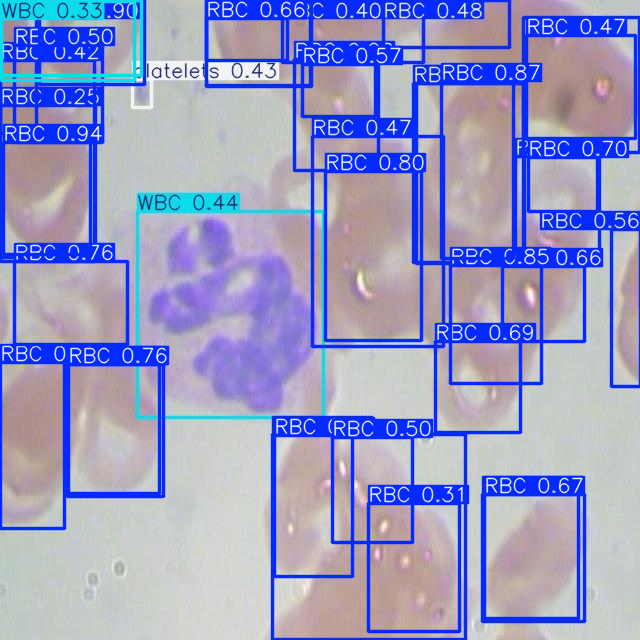

In [ ]:
from collections import Counter

result = model.predict(source="/content/runs/detect/predict/BloodImage_00004_jpg.rf.4b9c9c5ec6517d1b521e5ff7ab44d2dc.jpg", imgsz=640, conf=0.25)
annotated_res = result[0].plot()

detection = result[0].boxes.data
class_names = [model.names[int(cls)] for cls in detection[:, 4]] # 4 types of cells possible
count = Counter(class_names)

count_detected = ', '.join([f"{name}:{count}" for name, count in count.items()])
print(count_detected)

annotated_res[:,:,::-1]